In [38]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

**Загрузка данных**

Это URL-адрес набора данных по цветкам ириса:

https://www.kaggle.com/datasets/aryansingh2001/fish-csv

In [39]:
# Читаем датасет
dataset = pd.read_csv('/content/sample_data/Fish.csv', sep=',', encoding='cp1252')

**Анализ данных**


In [40]:
# размер датасета, 159 записей, 7 столбцов
dataset.shape

(159, 7)

In [41]:
# отображаем первые 10 сстрок датасета
dataset.head(10)

,ï»¿Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [42]:
# Заменим пробелы на NaN и проверим, сколько пропущеных значений в датасете
dataset = dataset.replace(' ', np.NaN)
np.count_nonzero(dataset.isnull().sum(axis= 1).values)

0

In [43]:
# Метод Pandas info()  выводит очень много информации о наборе данных - количество записей,
# количество ненулевых значений в каждом столбце, тип данных в столбце
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ï»¿Species  159 non-null    object 
 1   Weight      159 non-null    float64
 2   Length1     159 non-null    float64
 3   Length2     159 non-null    float64
 4   Length3     159 non-null    float64
 5   Height      159 non-null    float64
 6   Width       159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [44]:
# Pandas describe() используется для просмотра  основной статистической информации, таких как процентиль, среднее,
# стандартное отклонение и т.д. фрейма данных или ряда числовых значений:
dataset.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [45]:
dataset['ï»¿Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [46]:
# Теперь проверим количество строк, которое принадлежит каждому классу:
dataset['ï»¿Species'].value_counts()

,count
ï»¿Species,
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


Видим, что набор данных не сбалансированный.

**Визуализация данных**

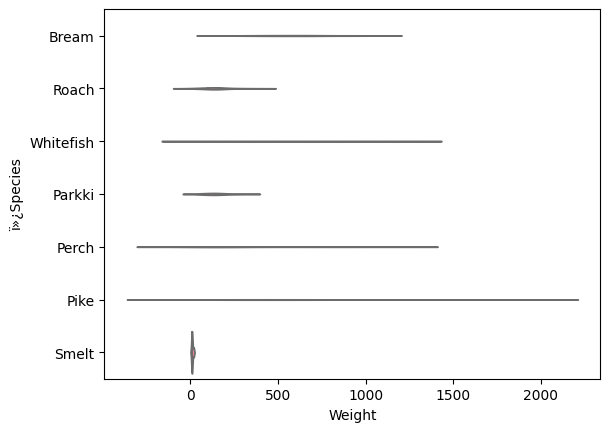

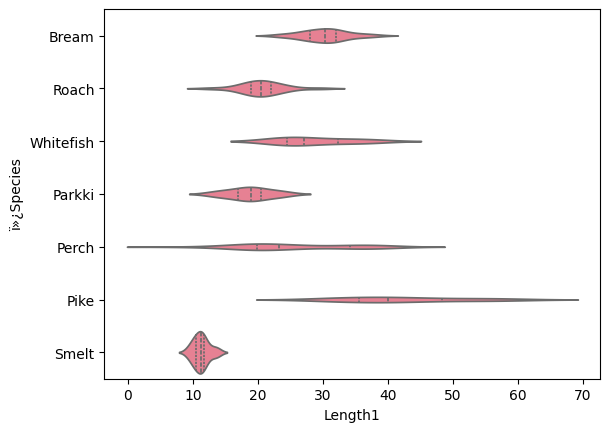

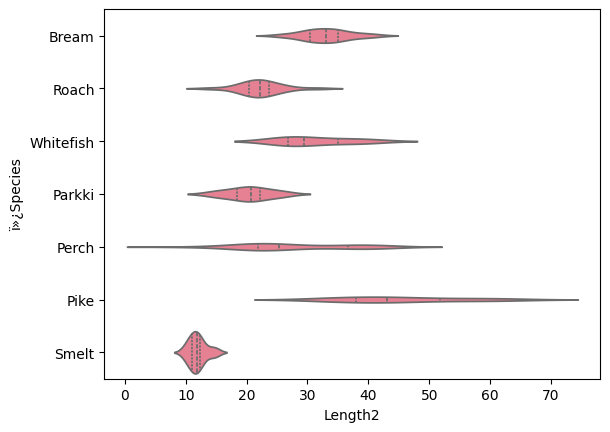

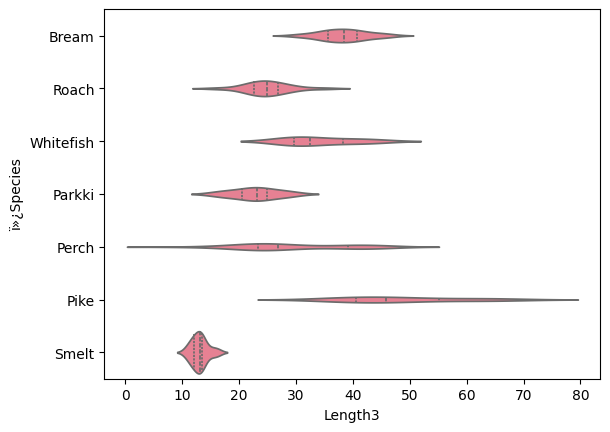

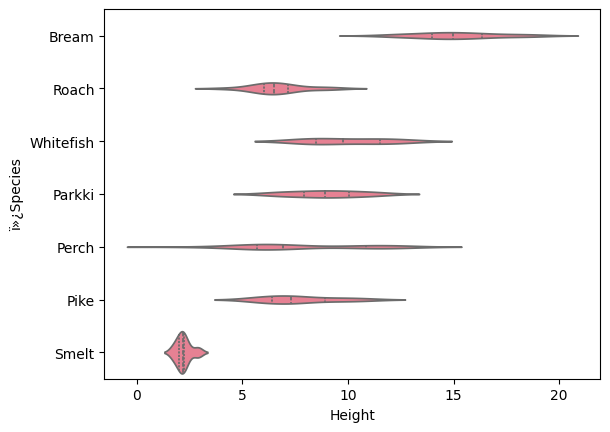

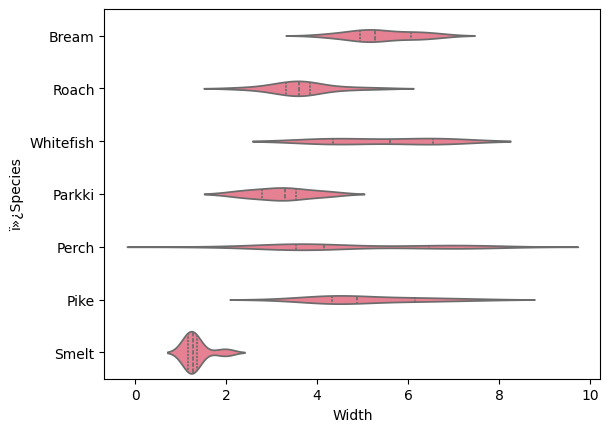

In [47]:
# Скрипичный график.
# Используется для проверки сравнения распределения переменных:
sns.violinplot(y='ï»¿Species', x='Weight', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='ï»¿Species', x='Length1', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='ï»¿Species', x='Length2', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='ï»¿Species', x='Length3', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='ï»¿Species', x='Height', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='ï»¿Species', x='Width', data=dataset, inner='quartile')
plt.show()

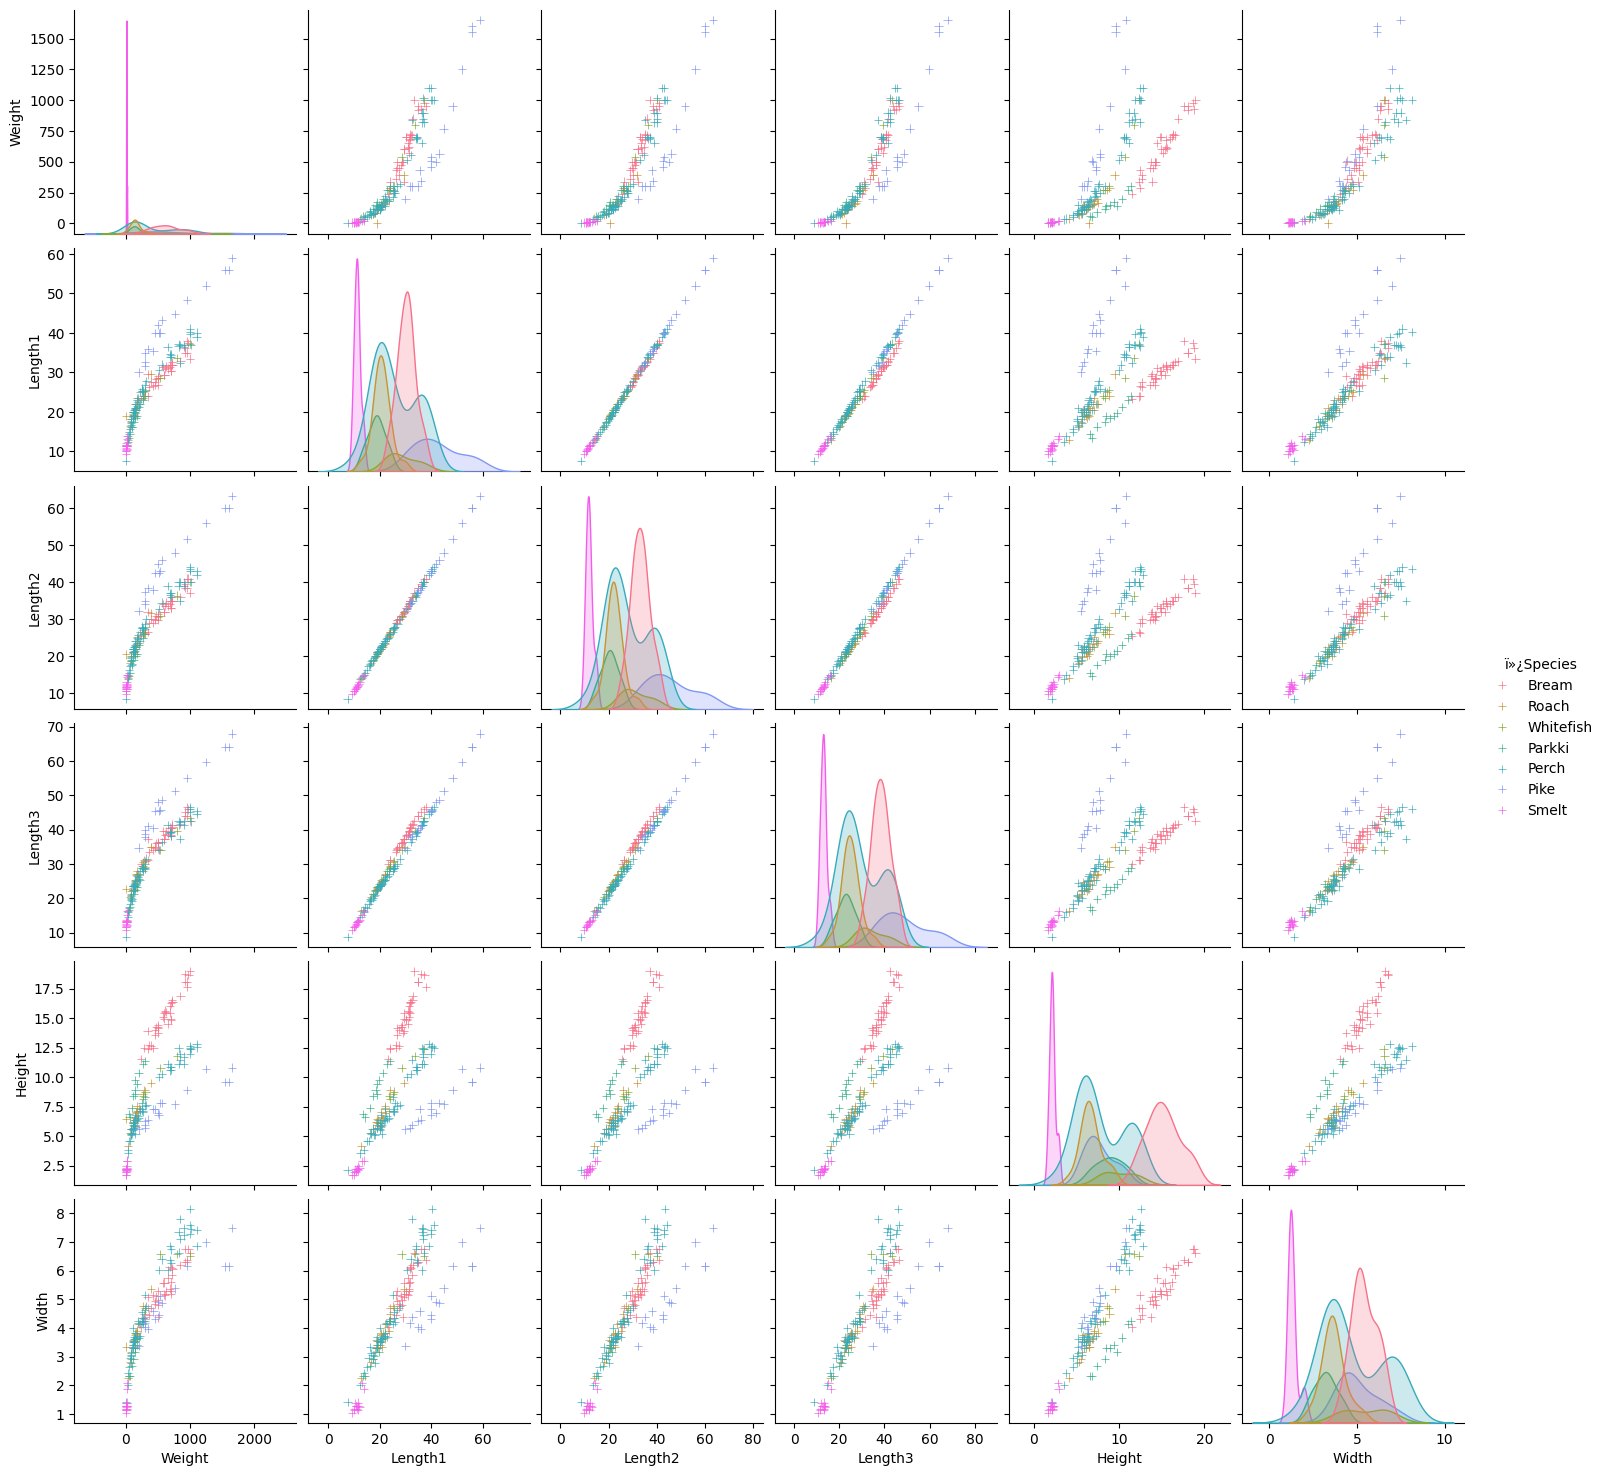

In [48]:
#Парный график
#Построение нескольких попарных двумерных распределений в наборе данных с помощью pairplot:
sns.pairplot(dataset, hue='ï»¿Species', markers='+')
plt.show()

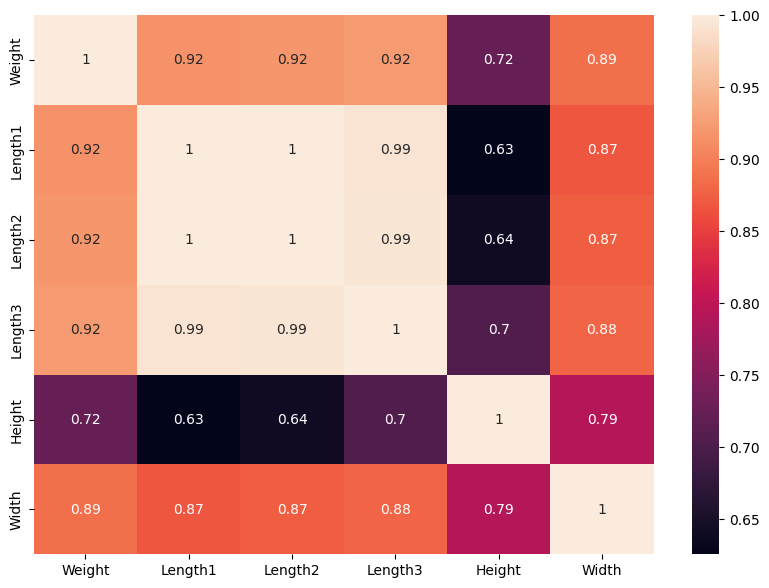

In [49]:
# Матрица корреляции.
plt.figure(figsize=(10,7))
sns.heatmap(dataset.corr(numeric_only = True), annot=True)
plt.show()

**Построение модели**

**Разделение набора данных**

Y - целевая переменная, которую предсказываем. Мы ищем зависимость этой переменной от соответствующих фич. В нашем случае это столбец class.

В X складываем весь набор данных без целевой переменной.

In [50]:
X = dataset.drop(['ï»¿Species'], axis=1)
y = dataset['ï»¿Species']
y_mapped = y.map({'Bream': 0, 'Roach': 1, 'Whitefish': 2, 'Parkki': 3, 'Perch': 4, 'Pike': 5, 'Smelt':6})
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (159, 6) | y shape: (159,) 


X имеет 159 строк и 6 столбцов, тогда как Y имеет 159 строк и только один столбец.

**Train Test разделение**

Разделяем наш набор данных на обучающий (train) и тестовый (test) с помощью train_test_split(), мы берем 80% данных для обучения нашей модели и 20% оставляем в качестве проверочного набора данных:

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.20, random_state=10)

**Обучение и выбор оптимальной модели**

Далее попробуем следующие алгоритмы:

Logistic Regression (LR)
Linear Discriminant Analysis (LDA)
K-Nearest Neighbors (KNN)
Classification and Regression Trees (CART)
Gaussian Naive Bayes (NB)
Support Vector Machines (SVM)

In [52]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.952564 (0.038802)
LDA: 0.960897 (0.052113)
KNN: 0.537821 (0.099077)
CART: 0.732051 (0.072626)
NB: 0.528846 (0.077733)
SVC: 0.494872 (0.104344)


LinearDiscriminantAnalysis показал лучшие метрики среди всех алгоритмов. Поэтому работаем с ним.

Давайте обучим модель LDA на нашем обучающем наборе и сделаем прогноз на тестовом наборе на следующем шаге.

**Обучение конкретной модели**

Определяем нашу модель LDA После этого подгоняем/обучаем модель на X_train и Y_train с помощью метода .fit(). Затем мы делаем прогноз на X_test с помощью метода .predict().

In [53]:
sk_lda = LinearDiscriminantAnalysis(solver='eigen')
sk_lda.fit(X_train, y_train)
sk_lda_pred_res = sk_lda.predict(X_test)
sk_transformed = sk_lda.transform(X_train)
sk_lda_accuracy = accuracy_score(y_test, sk_lda_pred_res)

print(f'sk LDA accuracy: {sk_lda_accuracy}')
print(f'sk LDA prediction: {sk_lda_pred_res}')
print('sk transformed features', sk_transformed[:5].T, sep='\n')

sk LDA accuracy: 1.0
sk LDA prediction: [1 4 1 0 5 4 5 0 2 4 3 3 1 0 1 6 4 0 3 4 0 4 6 4 0 1 4 2 5 6 4 3]
sk transformed features
[[  0.33512577  -7.27796259  -9.74241485 -15.28117268  -4.92114979]
 [ -6.39879889  -8.61925409  -5.56182241  -7.53496038  -6.27477839]
 [  8.62508026   3.27772988   5.42180591   6.54813478   6.81405003]
 [  0.44190175   3.68544008  -1.11602437   2.76108275   2.43471924]
 [ -1.42909148  -3.40536171  -4.30886874  -2.39656033  -1.45806097]
 [  1.15568221   1.35123962   0.49879836  -0.78244299   1.33122764]]


In [54]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

recall = metrics.recall_score(y_test, sk_lda_pred_res, average="weighted")
precision = metrics.precision_score(y_test, sk_lda_pred_res, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, sk_lda_pred_res, target_names=[str(i) for i in np.unique(y_test)]))

Recall (all 1s predicted right): 1.0
Precision (confidence when predicting a 1): 1.0
Detail:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



**Визуализация решения**

<Axes: title={'center': 'LDA surface with original features'}>

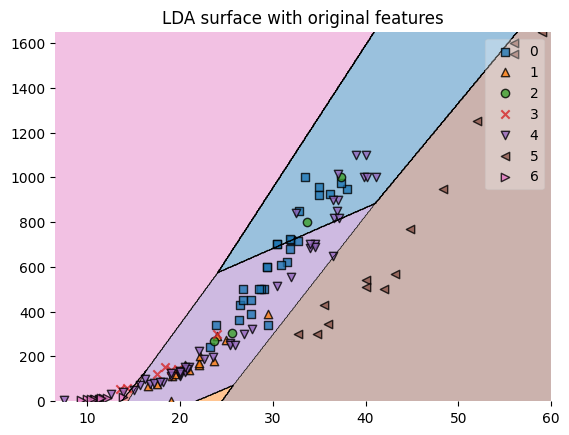

In [36]:
from mlxtend.plotting import plot_decision_regions

# Создадим целевой вектор y_2d
# Преобразуем классы к классам 0, 1, 2 соответственно
#y_s = y_train.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

y_s = y_train
X_2d= X_train[['Length1',	'Weight']].values

y_2d = y_s.values


sk_lda1 = LinearDiscriminantAnalysis(solver='eigen')
sk_lda1.fit(X_2d, y_2d)

plt.title('LDA surface with original features')
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=sk_lda1)